In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from glob import glob
import os
import TOC_functions
%matplotlib widget

In [2]:
root_folder = os.path.expanduser('C:/Users/ica/OneDrive - Plymouth Marine Laboratory/vscode/TOC_analysis/data/2025/01')  # yourpath
picarro_df = TOC_functions.merge_picarro_files(root_folder)
picarro_df = TOC_functions.qc(picarro_df)
picarro_df.set_index('datetime', inplace=True)



In [37]:
# filter by time

start_time = datetime.datetime(2025, 1, 30  , 4, 0, 0)
end_time = datetime.datetime(2025, 1, 30, 10, 0, 0)

In [38]:

df = picarro_df.loc[start_time:end_time]

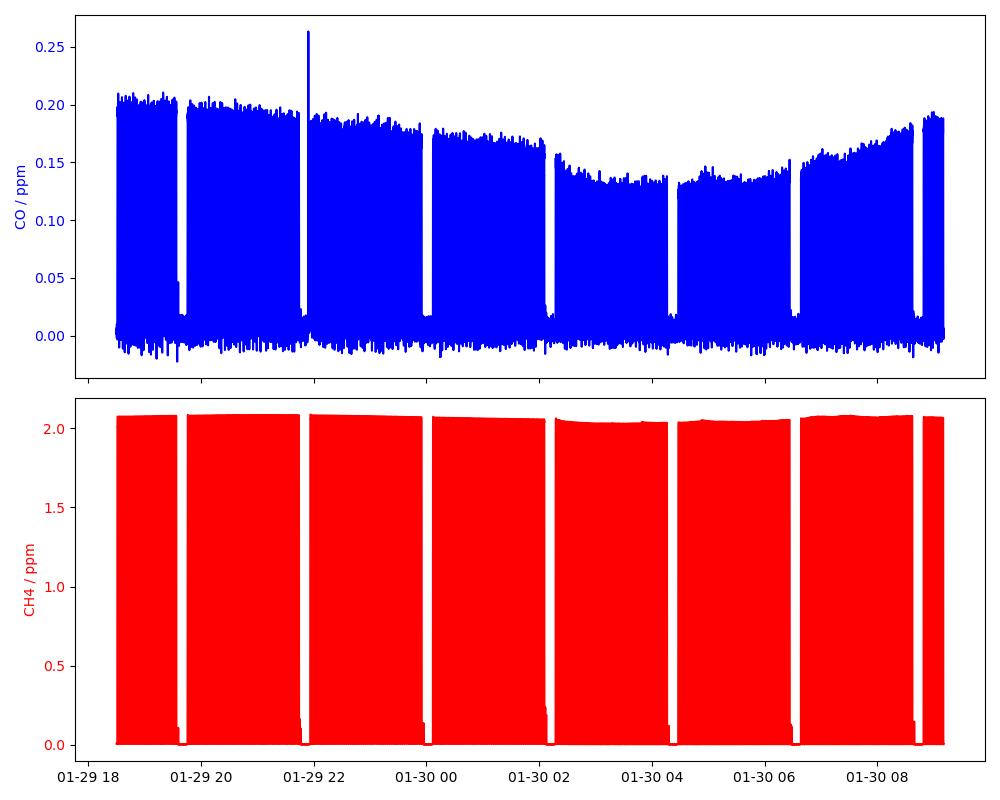

In [5]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# Plot for CO
ax1.plot(df.index, df.CO, label='CO / ppm', color='blue')
ax1.set_ylabel('CO / ppm', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot for CH4
ax2.plot(df.index, df.CH4, label='CH4 / ppm', color='red')
ax2.set_ylabel('CH4 / ppm', color='red')
ax2.tick_params(axis='y', labelcolor='red')
'''
# Plot for CO2
ax3.plot(df.index, df.CO2, label='CO2 / ppm', color='green')
ax3.set_xlabel('Date')
ax3.set_ylabel('CO2 / ppm', color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax4.plot(df.index, df.solenoid_valves, label='', color='green')
ax4.set_xlabel('Date')
ax4.set_ylabel('solenoid', color='green')
ax4.tick_params(axis='y', labelcolor='green')
'''

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

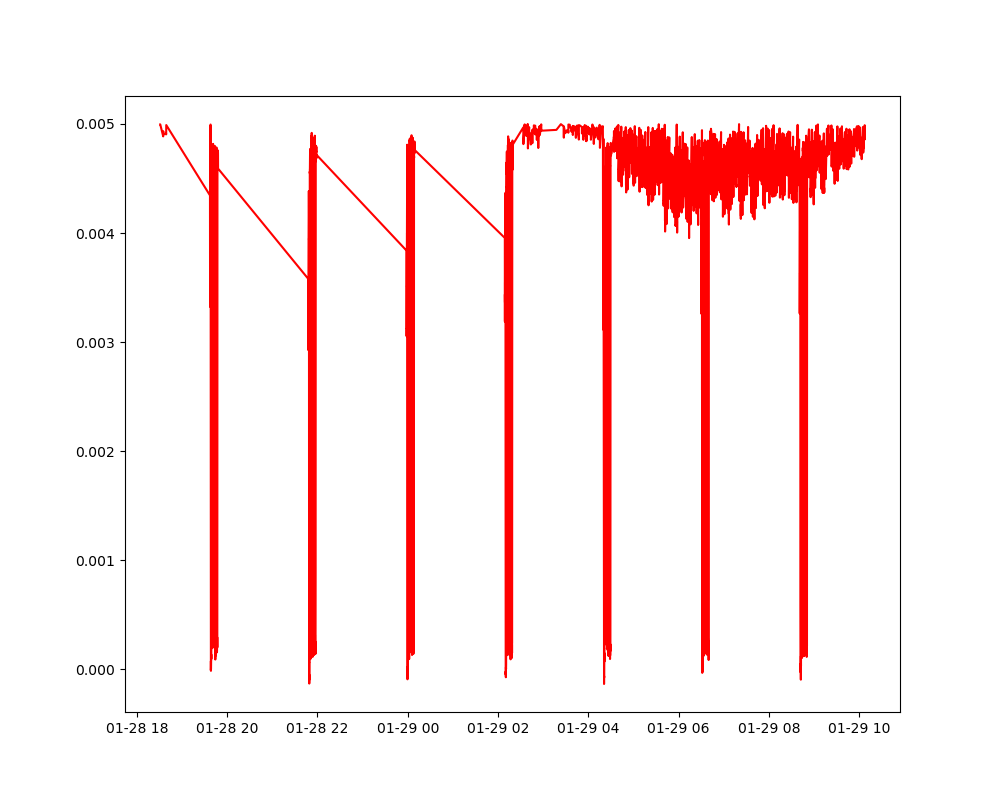

In [75]:
df_methane = df[df['CH4'] <0.005]
plt.figure(figsize=(10, 8))
plt.plot(df_methane.index, df_methane['CH4'], label='CH4 / ppm', color='red')
plt.show()

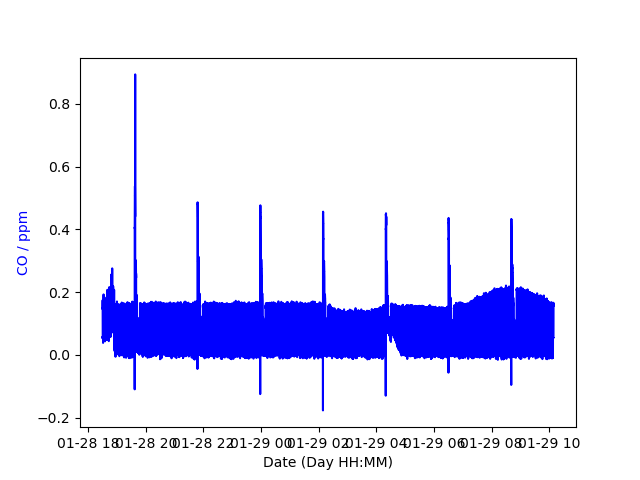

In [67]:
plt.figure()
plt.plot(df.index, df.CO, label='CO / ppm', color='blue')  
plt.xlabel('Date (Day HH:MM)')
plt.ylabel('CO / ppm', color='blue') 
plt.show()

In [48]:

df = df[df['solenoid_valves'] >= 3.9]


In [49]:
# TOC averages
TOC_df_blank =TOC_functions.TOC_df_blank(df)



In [50]:
toc = TOC_functions.calculate_toc(TOC_df_blank)
toc = toc[toc['TOC'] <= 0.25]


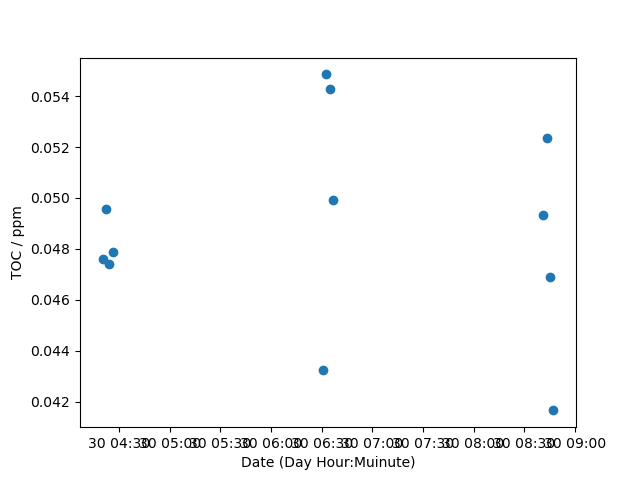

In [51]:
plt.figure()
plt.scatter(toc.index, toc['TOC'])
plt.ylabel('TOC / ppm')
plt.xlabel('Date (Day Hour:Muinute)')
plt.show()

In [52]:
toc.mean()

TOC    0.048745
dtype: float64